In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Explainability
!pip install shap
import shap


In [6]:
url = '/content/Autism_Data.arff'
df = pd.read_csv(url)
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [7]:
print(df.shape)
print(df.info())


(704, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-

In [8]:
print(df.isnull().sum())


A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [9]:
# Convert 'gender' column to numeric
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

# Encode target variable
le_target = LabelEncoder()
df['Class/ASD'] = le_target.fit_transform(df['Class/ASD'])


In [10]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']


In [12]:
print('Original dataset shape:', y.value_counts())

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print('Resampled dataset shape:', pd.Series(y_res).value_counts())


Original dataset shape: Class/ASD
0    515
1    189
Name: count, dtype: int64
Resampled dataset shape: Class/ASD
0    515
1    515
Name: count, dtype: int64


In [13]:
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)


In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       109

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



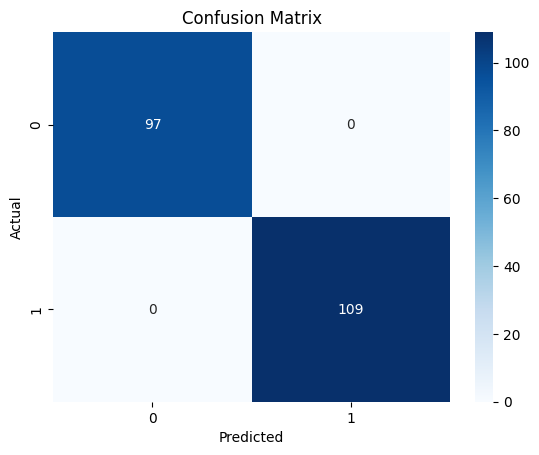

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


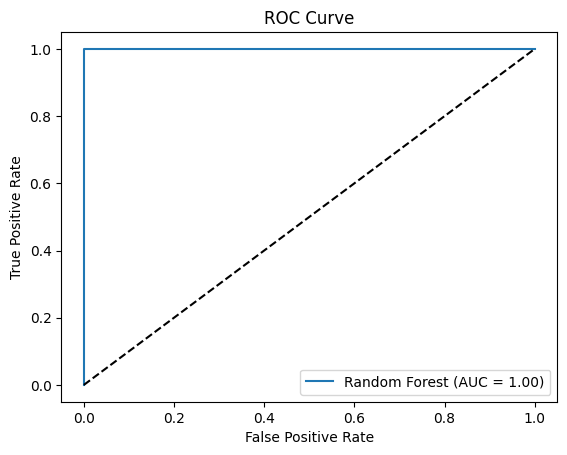

In [17]:
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [32]:
print("Type of shap_values:", type(shap_values))
print("shap_values[1] shape:", shap_values[1].shape)
print("X_test type:", type(X_test))
print("X_test shape:", X_test.shape)


Type of shap_values: <class 'numpy.ndarray'>
shap_values[1] shape: (140, 2)
X_test type: <class 'pandas.core.frame.DataFrame'>
X_test shape: (206, 140)


In [33]:
X_res_scaled = scaler.fit_transform(X_res)
X_scaled = pd.DataFrame(X_res_scaled, columns=X_res.columns)

# Then split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)


In [34]:
rf.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)


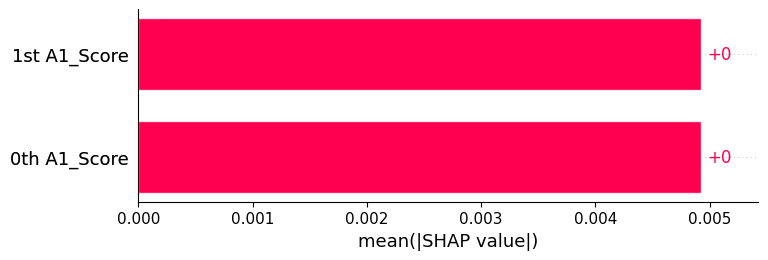

In [36]:

# SHAP Bar plot for global feature importance
shap.plots.bar(
    shap.Explanation(
        values=shap_values[1],
        base_values=explainer.expected_value[1],
        data=X_test,
        feature_names=X_test.columns
    )
)


In [38]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       109

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [39]:
import joblib
joblib.dump(best_rf, 'autism_rf_model.pkl')


['autism_rf_model.pkl']